In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

In [77]:
boston = load_boston()
features = boston.data
target = boston.target
features_name = boston.feature_names

C:\Users\ooonu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [282]:
def test_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    l_reg = LinearRegression()
    l_reg.fit(X_train, y_train)
    l_reg.score(X_test, y_test)

    l_reg = LinearRegression()
    l_reg.fit(X_train, y_train)
    l_reg.score(X_test, y_test)

    #print('r2_score: ', l_reg.score(X_test, y_test))
    return (l_reg, l_reg.score(X_test, y_test))

In [94]:
test_linear_regression(features, target)

r2_score:  0.6687594935356278


# Нормализуем значения

In [97]:
from sklearn import preprocessing

# Проведем EDA

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df = pd.DataFrame(np.column_stack((features, target)), columns=np.hstack((features_name, ['TARGET'])))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [110]:
cor = df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

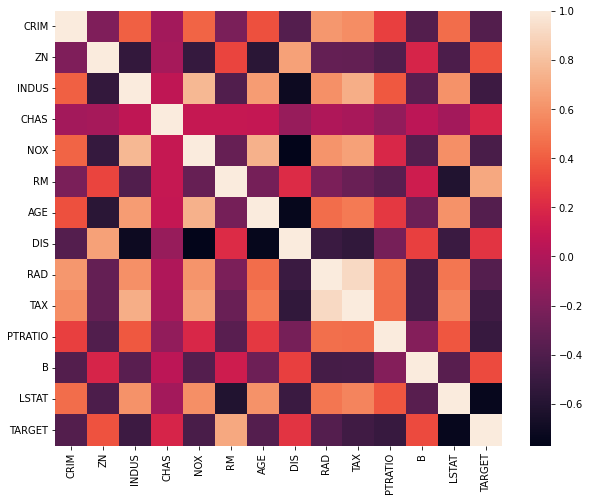

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(cor)

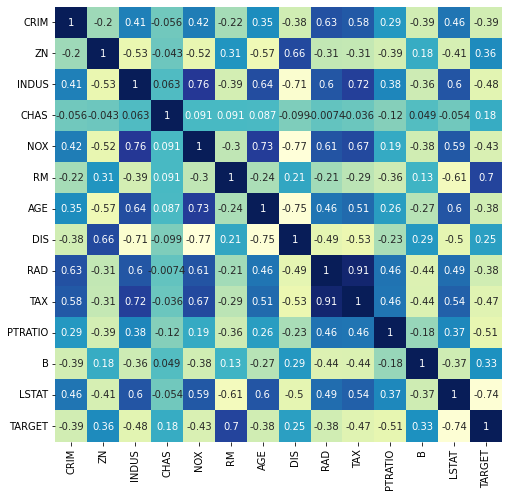

In [111]:
# Посмотрим на тепловую карту
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);

In [117]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

In [128]:
for feature in df.columns:
    sum_outliers = len(search_outliers(df[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")

Признак CRIM содержит 66 выбросов из 506 наблюдений
Признак ZN содержит 68 выбросов из 506 наблюдений
Признак INDUS содержит 0 выбросов из 506 наблюдений
Признак CHAS содержит 35 выбросов из 506 наблюдений
Признак NOX содержит 0 выбросов из 506 наблюдений
Признак RM содержит 30 выбросов из 506 наблюдений
Признак AGE содержит 0 выбросов из 506 наблюдений
Признак DIS содержит 5 выбросов из 506 наблюдений
Признак RAD содержит 0 выбросов из 506 наблюдений
Признак TAX содержит 0 выбросов из 506 наблюдений
Признак PTRATIO содержит 15 выбросов из 506 наблюдений
Признак B содержит 77 выбросов из 506 наблюдений
Признак LSTAT содержит 7 выбросов из 506 наблюдений
Признак TARGET содержит 40 выбросов из 506 наблюдений


In [307]:
def drop_outliers(data, inplace=False):
    drop_index = np.array([])
    for feature in df.columns:
        drop_index = np.hstack((drop_index, search_outliers(df[feature])))
    return data.drop(drop_index, inplace=inplace)

def search_outliers_new(old_feature, new_feature):
    """Функция принимает набор значений 1-го признака каким он был до удаления выбросов,
    чтобы корректно расчитать границы выбросов
    И набор значений того же признака после удаления выбросов
    Возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(old_feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((new_feature < lower_bound) | (new_feature > upper_bound))[0]

def find_best_features(reg, data):
    coef = pd.DataFrame(reg.coef_, index=features_name, columns=['coef'])
    sorted_coef = round(abs(coef).sort_values('coef', ascending=False))

    best_score = test_linear_regression(data.drop('TARGET', axis=1), data['TARGET'])[1]
    best_features = list(data.columns.values)
    for i in range(1, data.shape[1] - 1):
        X_best = data[list(sorted_coef[:i].index)]
        y = data.TARGET
        new_score = test_linear_regression(X_best, y)[1]
        if new_score > best_score:
            best_score = new_score
            best_features = X_best
    print('best score:', best_score)
    return best_features

In [256]:
d = drop_outliers(df)
for feature in df.columns:
    sum_outliers = len(search_outliers_new(df[feature], d[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {d[feature].shape[0]} наблюдений")

Признак CRIM содержит 0 выбросов из 268 наблюдений
Признак ZN содержит 0 выбросов из 268 наблюдений
Признак INDUS содержит 0 выбросов из 268 наблюдений
Признак CHAS содержит 0 выбросов из 268 наблюдений
Признак NOX содержит 0 выбросов из 268 наблюдений
Признак RM содержит 0 выбросов из 268 наблюдений
Признак AGE содержит 0 выбросов из 268 наблюдений
Признак DIS содержит 0 выбросов из 268 наблюдений
Признак RAD содержит 0 выбросов из 268 наблюдений
Признак TAX содержит 0 выбросов из 268 наблюдений
Признак PTRATIO содержит 0 выбросов из 268 наблюдений
Признак B содержит 0 выбросов из 268 наблюдений
Признак LSTAT содержит 0 выбросов из 268 наблюдений
Признак TARGET содержит 0 выбросов из 268 наблюдений


In [290]:
reg = test_linear_regression(d.drop('TARGET', axis=1), d.TARGET)[0]
sorted(reg.coef_)

[-1.053401914044275,
 -0.7109720834359541,
 -0.6569429298489212,
 -0.2992475805890461,
 -0.17398391375182257,
 -0.0441895094140321,
 -0.03386775527943525,
 -0.014740240787574542,
 -0.010817480966202496,
 5.440092820663267e-15,
 0.01476202413443139,
 0.45936692695078507,
 4.8874632022255335]

Видим, что большинство признаков не очень информативные, попробуем удалить

In [308]:
reg = test_linear_regression(df.drop('TARGET', axis=1), df.TARGET)[0]
find_best_features(reg, df)

best score: 0.6754022231974177


,NOX,RM,CHAS,DIS,PTRATIO,LSTAT,RAD,CRIM,INDUS,ZN
0,0.538,6.575,0.0,4.0900,15.3,4.98,1.0,0.00632,2.31,18.0
1,0.469,6.421,0.0,4.9671,17.8,9.14,2.0,0.02731,7.07,0.0
2,0.469,7.185,0.0,4.9671,17.8,4.03,2.0,0.02729,7.07,0.0
3,0.458,6.998,0.0,6.0622,18.7,2.94,3.0,0.03237,2.18,0.0
4,0.458,7.147,0.0,6.0622,18.7,5.33,3.0,0.06905,2.18,0.0
...,...,...,...,...,...,...,...,...,...,...
501,0.573,6.593,0.0,2.4786,21.0,9.67,1.0,0.06263,11.93,0.0
502,0.573,6.120,0.0,2.2875,21.0,9.08,1.0,0.04527,11.93,0.0
503,0.573,6.976,0.0,2.1675,21.0,5.64,1.0,0.06076,11.93,0.0
504,0.573,6.794,0.0,2.3889,21.0,6.48,1.0,0.10959,11.93,0.0


In [309]:
reg = test_linear_regression(d.drop('TARGET', axis=1), d.TARGET)[0]
find_best_features(reg, d)

best score: 0.808542297158312


,RM,CRIM,PTRATIO,DIS,RAD,NOX,LSTAT,AGE,ZN
0,6.575,0.00632,15.3,4.0900,1.0,0.538,4.98,65.2,18.0
1,6.421,0.02731,17.8,4.9671,2.0,0.469,9.14,78.9,0.0
2,7.185,0.02729,17.8,4.9671,2.0,0.469,4.03,61.1,0.0
3,6.998,0.03237,18.7,6.0622,3.0,0.458,2.94,45.8,0.0
4,7.147,0.06905,18.7,6.0622,3.0,0.458,5.33,54.2,0.0
...,...,...,...,...,...,...,...,...,...
501,6.593,0.06263,21.0,2.4786,1.0,0.573,9.67,69.1,0.0
502,6.120,0.04527,21.0,2.2875,1.0,0.573,9.08,76.7,0.0
503,6.976,0.06076,21.0,2.1675,1.0,0.573,5.64,91.0,0.0
504,6.794,0.10959,21.0,2.3889,1.0,0.573,6.48,89.3,0.0


Видим, что для данных без выбросов лучше брать 9 фич, а для исходных - все 13

# Нормализация

In [305]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_features = min_max_scaler.fit_transform(features)
nd = pd.DataFrame(np.column_stack((norm_features, target)), columns=np.hstack((features_name, ['TARGET'])))
reg_and_score = test_linear_regression(nd.drop('TARGET', axis=1), nd.TARGET)

Качество не улучшилось, попробуем оставить только лучшие фичи

In [310]:
find_best_features(reg_and_score[0], nd)

best score: 0.6715231799608913


,RM,LSTAT,DIS,CRIM,PTRATIO,NOX,RAD,TAX,B,ZN,CHAS
0,0.577505,0.089680,0.269203,0.000000,0.287234,0.314815,0.000000,0.208015,1.000000,0.18,0.0
1,0.547998,0.204470,0.348962,0.000236,0.553191,0.172840,0.043478,0.104962,1.000000,0.00,0.0
2,0.694386,0.063466,0.348962,0.000236,0.553191,0.172840,0.043478,0.104962,0.989737,0.00,0.0
3,0.658555,0.033389,0.448545,0.000293,0.648936,0.150206,0.086957,0.066794,0.994276,0.00,0.0
4,0.687105,0.099338,0.448545,0.000705,0.648936,0.150206,0.086957,0.066794,1.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
501,0.580954,0.219095,0.122671,0.000633,0.893617,0.386831,0.000000,0.164122,0.987619,0.00,0.0
502,0.490324,0.202815,0.105293,0.000438,0.893617,0.386831,0.000000,0.164122,1.000000,0.00,0.0
503,0.654340,0.107892,0.094381,0.000612,0.893617,0.386831,0.000000,0.164122,1.000000,0.00,0.0
504,0.619467,0.131071,0.114514,0.001161,0.893617,0.386831,0.000000,0.164122,0.991301,0.00,0.0


In [320]:
standart_scaler = preprocessing.StandardScaler()
standart_feature = standart_scaler.fit_transform(df.drop('TARGET', axis=1))
sd = pd.DataFrame(np.column_stack((standart_feature, target)), columns=np.hstack((features_name, ['TARGET'])))
sd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


In [321]:
reg = test_linear_regression(sd.drop('TARGET', axis=1), sd.TARGET)[0]
find_best_features(reg, sd)

best score: 0.6726543801851019


,LSTAT,RM,DIS,RAD,NOX,PTRATIO,TAX
0,-1.075562,0.413672,0.140214,-0.982843,-0.144217,-1.459000,-0.666608
1,-0.492439,0.194274,0.557160,-0.867883,-0.740262,-0.303094,-0.987329
2,-1.208727,1.282714,0.557160,-0.867883,-0.740262,-0.303094,-0.987329
3,-1.361517,1.016303,1.077737,-0.752922,-0.835284,0.113032,-1.106115
4,-1.026501,1.228577,1.077737,-0.752922,-0.835284,0.113032,-1.106115
...,...,...,...,...,...,...,...
501,-0.418147,0.439316,-0.625796,-0.982843,0.158124,1.176466,-0.803212
502,-0.500850,-0.234548,-0.716639,-0.982843,0.158124,1.176466,-0.803212
503,-0.983048,0.984960,-0.773684,-0.982843,0.158124,1.176466,-0.803212
504,-0.865302,0.725672,-0.668437,-0.982843,0.158124,1.176466,-0.803212
